In [46]:
import numpy as np
from pathlib import Path
import cmath
import sys
import os
import importlib

sys.path.insert(0, os.path.abspath('../src'))
from modeling_cascading_failure import simulate
importlib.reload(simulate)

nprect = np.vectorize(cmath.rect)
npphase = np.vectorize(cmath.phase)
def convert_complex(x):
    return complex(x.replace("im","j").replace(" ",""))
npconvert = np.vectorize(convert_complex)

# prepare inputs

p = Path("./WECC_240_data_for_python")
base_mva = 100

# get data
Y = np.loadtxt(p / "Y.csv", delimiter=",", dtype=str)
Y = npconvert(Y)
PV_x = np.loadtxt(p / "PV_x.csv", delimiter=",", dtype=str).astype(int).reshape(-1,1)
PQ_x = np.loadtxt(p / "PQ_x.csv", delimiter=",", dtype=str).astype(int).reshape(-1,1)
x_slack = np.loadtxt(p / "x_slack.csv", delimiter=",", dtype=str).astype(int).reshape(-1,1)
V_abs = np.loadtxt(p / "V_abs.csv", delimiter=",", dtype=float).reshape(-1,1)
V_phase = np.loadtxt(p / "V_phase.csv", delimiter=",", dtype=float).reshape(-1,1)
P_input = np.loadtxt(p / "P_input.csv", delimiter=",", dtype=float).reshape(-1,1)
Q_input = np.loadtxt(p / "Q_input.csv", delimiter=",", dtype=float).reshape(-1,1)

In [47]:
num_buses = Y.shape[0]
eps=0.0001
max_iter=10
I = 1
gamma=1
I_array = np.ones(num_buses).reshape(-1,1)*I
gamma_array = np.ones(num_buses).reshape(-1,1)*gamma
(theta,omega,F,failure_time,F_threshold)=simulate.simulate_system(
    Y,
    PV_x,
    PQ_x,
    x_slack,
    V_abs,
    V_phase,
    P_input,
    Q_input,
    eps,
    max_iter,
    base_MVA=base_mva,
    line_to_cut=(1,0),
    cut_time=1,
    delta_t=0.1,
    alpha=0.5,
    I=I_array,
    gamma=gamma_array,
    t_max=10
)
# import matplotlib.pyplot as plt
# lines = np.argwhere(np.abs(F.sel(time=0).values)>0)
# lines = list(set([tuple(sorted(line)) for line in lines]))
# fig,ax=plt.subplots()
# for line in lines:
#     data= F.sel(node_i=line[0],node_j=line[1])
#     plt.plot(data.time,data.values,label="{}_{}".format(line[0],line[1]))
#     plt.title("I={},$\gamma$={}".format(I,gamma))
#     plt.legend()
#     plt.savefig("I={},gamma={}.png".format(I,gamma),dpi=300)

running N-R
0
1
2
3
4
5
6
7
8
9
10
finished N-R
running simulation
0


KeyboardInterrupt: 

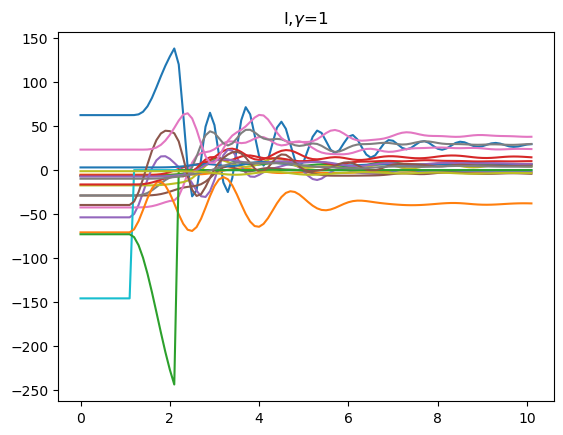

In [30]:
failure_time

[(1, 0, 1), (2.9000000000000012, 0, 4)]

In [49]:
lines = list(np.argwhere(np.abs(F.sel(time=0).values)>0))


[(3, 4),
 (12, 13),
 (5, 10),
 (8, 9),
 (1, 3),
 (6, 8),
 (4, 5),
 (3, 6),
 (5, 12),
 (0, 1),
 (9, 10),
 (1, 2),
 (0, 4),
 (3, 8),
 (5, 11),
 (1, 4),
 (2, 3),
 (8, 13),
 (11, 12)]